# The Tensorflow Way



Practicing From My Tensorflow ML Cookbook

Basic Terms of NN-https://www.analyticsvidhya.com/blog/2017/05/25-must-know-terms-concepts-for-beginners-in-deep-learning/

# 1. Linear Regression: Inverse Matrix Method

We will use Tensorflow to solve 2D linear regressions with the matrix inverse method

Linear regression can be represented as a set of matrix equation, say Ax=b.Here we are interested in solving the coefficients in the matrix x . We have to be careful if our observatio matrix(design matrix) A is not square .

# Model

This notebook explores how to accomplish linear regression with TensorFlow using the matrix inverse.

Given the system $ A \cdot x = y $, the matrix inverse way of linear regression (equations for overdetermined systems) is given by solving for x as follows.

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$
As a reminder, here, $x$ is our parameter matrix (vector of length $F+1$, where $F$ is the number of features). Here, $A$, our design matrix takes the form

$$
A=
\begin{bmatrix}
    1 &amp; x_{11} &amp; x_{12} &amp; \dots  &amp; x_{1F} \\
    1 &amp; x_{21} &amp; x_{22} &amp; \dots  &amp; x_{2F} \\
    \vdots &amp; \vdots &amp; \vdots &amp; \ddots &amp; \vdots \\
    1 &amp; x_{n1} &amp; x_{n2} &amp; \dots  &amp; x_{nF}
\end{bmatrix}
$$
Where $F$ is the number of independent features, and $n$ is the number of points. For an overdetermined system, n>F. Remember that one observed point in our system will have length $F+1$ and the $i^{th}$ point will look like

$$point_{i} = \left( y_{i}, x_{i1}, x_{i2}, \dots, x_{iF} \right)$$
For this , we will consider only a 2-dimensional system ($F=1$), so that we can plot the results at the end.

***1.First we will load the necessary libraries ,initialize the graph and create the data***

In [10]:


import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#starting the session
sess = tf.Session()


For illustration purposes, we randomly generate data to fit.

The x-values will be a sequence of 100 evenly spaced values between 0 and 100.

The y-values will fit to the line: $y=x$, but we will add normally distributed error according to $N(0,1)$.

In [11]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

***2.Now we create the matrices to use in the inverse method .We create A matrix first ,which will be a column of x-data and a column of 1s.Then we create the b matirx from the y-data ***

We create the design matrix, $A$, which will be a column of ones and the x-values.

In [13]:
x_vals_column= np.transpose(np.matrix(x_vals))
#x_vals_column
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

We now create the y-values as a matrix with Numpy.

After we have the y-values and the design matrix, we create tensors from them.

In [14]:
# Format the y matrix
y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)


Now we solve for the parameter matrix with TensorFlow operations.

In [15]:
# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

Now we will Run the solutions and extract the slope and intercept from the parameter matrix.

In [16]:
solution_eval = sess.run(solution)

# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

Now we print the solution we found and create a best fit line.

In [17]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 0.9799894430869264
y_intercept: 0.22201411871025425


We use Matplotlib to plot the results.

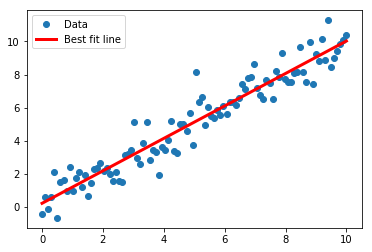

In [18]:
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

# 2.Linear Regression: Using a Decomposition (Cholesky Method)


Linear Regression: Using a Decomposition (Cholesky Method)
This script will use TensorFlow's function, tf.cholesky() to decompose our design matrix and solve for the parameter matrix from linear regression.

For linear regression we are given the system $A \cdot x = y$. Here, $A$ is our design matrix, $x$ is our parameter matrix (of interest), and $y$ is our target matrix (dependent values).

For a Cholesky decomposition to work we assume that $A$ can be broken up into a product of a lower triangular matrix, $L$ and the transpose of the same matrix, $L^{T}$.

Note that this is when $A$ is square. Of course, with an over determined system, $A$ is not square. So we factor the product $A^{T} \cdot A$ instead. We then assume:

$$A^{T} \cdot A = L^{T} \cdot L$$
For more information on the Cholesky decomposition and it's uses, see the following wikipedia link:https://en.wikipedia.org/wiki/Cholesky_decomposition

Given that $A$ has a unique Cholesky decomposition, we can write our linear regression system as the following:

$$ L^{T} \cdot L \cdot x = A^{T} \cdot y $$
Then we break apart the system as follows:

$$L^{T} \cdot z = A^{T} \cdot y$$
and

$$L \cdot x = z$$
The steps we will take to solve for $x$ are the following

1. Compute the Cholesky decomposition of $A$, where $A^{T} \cdot A = L^{T} \cdot L$.

2. Solve ($L^{T} \cdot z = A^{T} \cdot y$) for $z$.

3. Finally, solve ($L \cdot x = z$) for $x$.

Again ,We start by loading the necessary libraries.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [21]:
#Next we create a graph session
sess = tf.Session()

#We use the same method of generating data as in the prior example for consistency.

x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

We generate the design matrix, $A$.

In [22]:
# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

In [23]:
#Next, we generate the

y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)


Now we calculate the square of the matrix $A$ and the Cholesky decomposition.

In [24]:
# Find Cholesky Decomposition
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)

We solve the first equation. ( step 2 in the intro paragraph above)

In [25]:
# Solve L*y=t(A)*b
tA_y = tf.matmul(tf.transpose(A_tensor), y)
sol1 = tf.matrix_solve(L, tA_y)


We finally solve for the parameter matrix by solving the second equation ( step 3 in the intro paragraph).

In [26]:
# Solve L' * y = sol1
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

solution_eval = sess.run(sol2)

Extract the coefficients and create the best fit line.

In [27]:
# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 0.9786126225348207
y_intercept: 0.08630165835225388


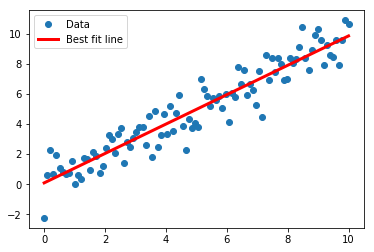

In [28]:
#Finally, we plot the fit with Matplotlib.
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()